## Step 1 : Importing all Necessary Libraries

In [4]:
import numpy as np           # For numerical operations
import pandas as pd          # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns            # For statistical plots and better visualizations
from sklearn.model_selection import train_test_split   # For splitting the dataset
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler  # For encoding categorical variables and feature scaling
from sklearn.tree import DecisionTreeClassifier        # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Random Forest and Gradient Boosting
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc  # Evaluation Metrics
import xgboost as xgb        # For XGBoost
import lightgbm as lgb       # For LightGBM
import catboost as cb        # For CatBoost
from scipy import stats      # For statistical tests and probability distributions
from sklearn.inspection import permutation_importance   # For feature importance
import shap                                            # SHAP for model interpretability (if necessary)
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings

## Step 2 : Data Importation And Pre - Processing

In [6]:
data = pd.read_csv("digital_marketing_campaign_dataset.csv")

In [7]:
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [8]:
data.shape            #Shape of the Dataset

(8000, 20)

In [9]:
data.isnull().sum()   #Checking all null values

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [10]:
data.info()             #Checking the Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [11]:
data.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [12]:
#Conclusion - There are no null values

## Step 3 : Exploratory Data Analysis (EDA)

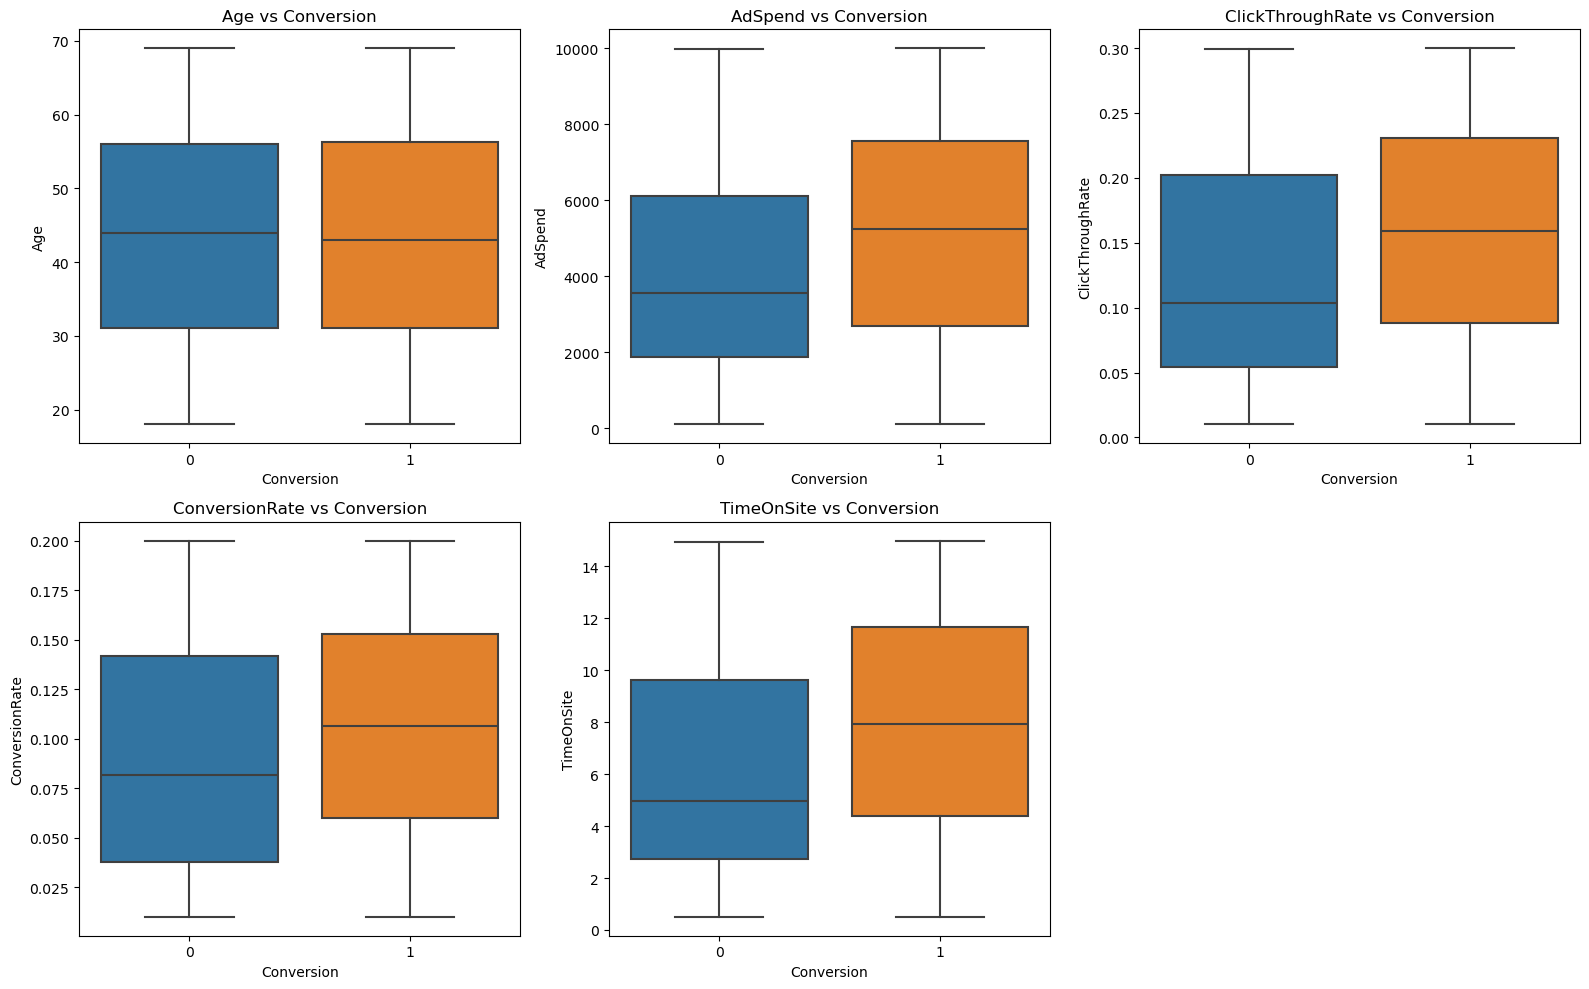

In [14]:
# Visualizing relationships between selected numerical features and the target (Conversion)
plt.figure(figsize=(16, 10))

# Age vs Conversion
plt.subplot(2, 3, 1)
sns.boxplot(x='Conversion', y='Age', data=data)
plt.title('Age vs Conversion')

# AdSpend vs Conversion
plt.subplot(2, 3, 2)
sns.boxplot(x='Conversion', y='AdSpend', data=data)
plt.title('AdSpend vs Conversion')

# ClickThroughRate vs Conversion
plt.subplot(2, 3, 3)
sns.boxplot(x='Conversion', y='ClickThroughRate', data=data)
plt.title('ClickThroughRate vs Conversion')

# ConversionRate vs Conversion
plt.subplot(2, 3, 4)
sns.boxplot(x='Conversion', y='ConversionRate', data=data)
plt.title('ConversionRate vs Conversion')

# TimeOnSite vs Conversion
plt.subplot(2, 3, 5)
sns.boxplot(x='Conversion', y='TimeOnSite', data=data)
plt.title('TimeOnSite vs Conversion')

plt.tight_layout()
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

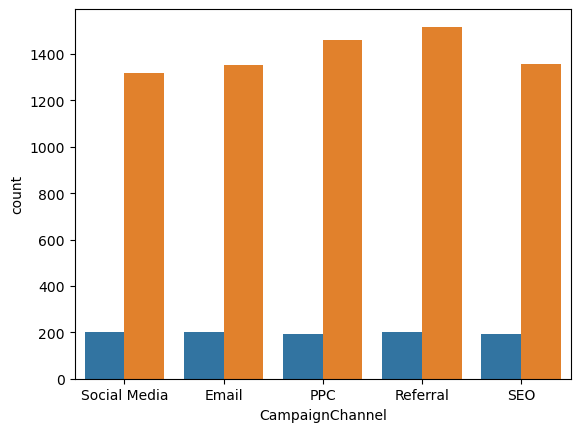

In [15]:
# CampaignChannel vs Conversion
sns.countplot(x='CampaignChannel', hue='Conversion', data=data)
plt.title('CampaignChannel vs Conversion')
plt.show()

# CampaignType vs Conversion
sns.countplot(x='CampaignType', hue='Conversion', data=data)
plt.title('CampaignType vs Conversion')
plt.show()

# AdvertisingPlatform vs Conversion
sns.countplot(x='AdvertisingPlatform', hue='Conversion', data=data)
plt.title('AdvertisingPlatform vs Conversion')
plt.show()

# AdvertisingTool vs Conversion
sns.countplot(x='AdvertisingTool', hue='Conversion', data=data)
plt.title('AdvertisingTool vs Conversion')
plt.show()
